In [1]:
import keras

In [2]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [3]:
import numpy as np

x=np.load('/content/drive/MyDrive/brain tumor segmentation/asad data/data/appended all/training/appended flair/flair.npy')
y=np.load('/content/drive/MyDrive/brain tumor segmentation/asad data/data/appended all/training/appended masks/masks.npy')

In [4]:
image2D = []
mask2D = []
for i in range(195):
  for j in range(128):
    image2D.append(x[i,:,:,j])
    mask2D.append(y[i,:,:,j])
x = np.array(image2D)
y = np.array(mask2D)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.20)

In [6]:
x_train.shape,x_test.shape

((15974, 128, 128), (3994, 128, 128))

(15974, 128, 128)

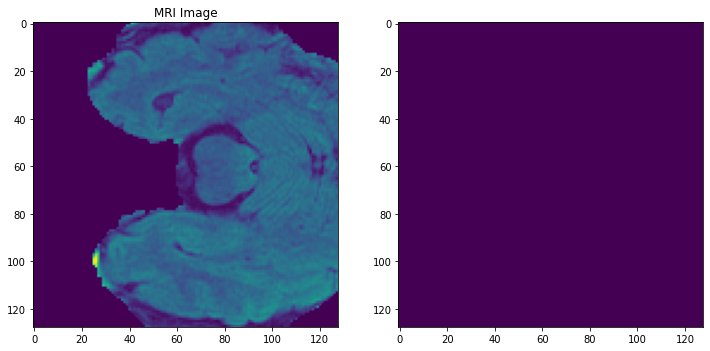

In [7]:
import matplotlib.pyplot as plt
rand=np.random.randint(0,15974 )
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.title('MRI Image')
plt.imshow(x_train[rand])
plt.subplot(122)
plt.imshow(y_train[rand])
plt.imshow
y_train.shape

In [8]:
import tensorflow as tf
x_train = np.expand_dims(x_train, axis = 3)
x_val = np.expand_dims(x_val, axis = 3)
x_test = np.expand_dims(x_test, axis = 3)
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
x_test.shape

(3994, 128, 128, 1)

In [23]:
from tensorflow.keras import backend as K
def iou(y_true, y_pred, smooth = 100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

def dice_coef(y_true, y_pred, smooth = 100):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def accuracy(y_true, y_pred):
    '''Calculates the mean accuracy rate across all predictions for binary
    classification problems.
    '''
    return K.mean(K.equal(y_true, K.round(y_pred)))


In [10]:
path='/content/drive/MyDrive/brain tumor segmentation/asad data/results/final Results all modility/results/exp flair/t2 model.zip'

In [ ]:
from zipfile import ZipFile

In [ ]:
new_path='/content/drive/MyDrive/brain tumor segmentation/asad data/results/final Results all modility/results/exp flair/extracted_model'

In [ ]:
from zipfile import ZipFile
ZipFile(path).extractall(new_path)

In [11]:
model=keras.models.load_model('/content/drive/MyDrive/brain tumor segmentation/asad data/results/final Results all modility/results/exp flair/extracted_model/t2 model')

In [12]:
prediction = model.predict(x_test)
prediction.shape

(3994, 128, 128, 4)

In [13]:
pred=np.argmax(prediction, axis=3)

In [14]:
pred.shape

(3994, 128, 128)

In [15]:
y_test_max=np.argmax(y_test, axis=3)

In [16]:
y_test_max.shape


(3994, 128, 128)

In [17]:
x_test.shape

(3994, 128, 128, 1)

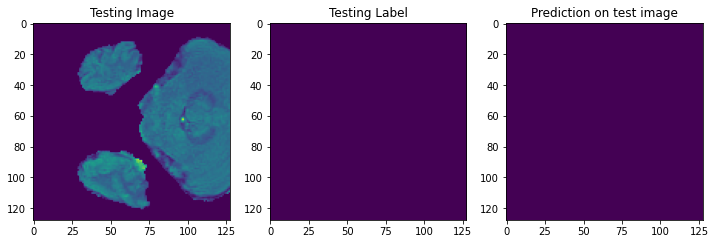

In [48]:
import random
image = random.randint(0,2688)

plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.title('Testing Image')
plt.imshow(x_test[image,:,:,0])
plt.subplot(132)
plt.title('Testing Label')
plt.imshow(y_test_max[image])
plt.subplot(133)
plt.title('Prediction on test image')
plt.imshow(pred[image])
plt.show()

In [20]:
from sklearn.metrics import jaccard_score
iou=jaccard_score(y_test_max[:,:,:].flatten(),pred[:,:,:].flatten(),average=None)
iou

array([0.98164457, 0.33397079, 0.49965976, 0.41385453])

In [25]:
s=iou(y_test_max.flatten(),pred.flatten())
s

<tf.Tensor: shape=(), dtype=float64, numpy=0.6323359807082383>

AttributeError: ignored

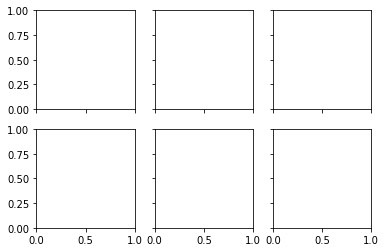

In [43]:
image = random.randint(0,2688)
image1=random.randint(0,2688)
import matplotlib.pyplot as plt

rows, cols = 2, 3
fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row')

for row in range(rows):
    for col in range(cols):
        ax[row, col].show[x_test[image,:,:,0]]

plt.show()